In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import mean_absolute_percentage_error

np.random.seed(123)
tf.random.set_seed(123)

In [4]:
!curl -O  https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  2036  100  2036    0     0   1845      0  0:00:01  0:00:01 --:--:--  1854


In [5]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
df['LogPassengers']=np.log(df['Passengers'])

In [7]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [8]:
# boolean series to index df rows
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [9]:
df['DiffLogPassengers']=df['LogPassengers'].diff()

In [12]:
# Make supervised dataset
series=df['DiffLogPassengers'].dropna().to_numpy()

T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (133, 10, 1) Y.shape (133,)


In [13]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

In [15]:
# CNN
i=Input(shape=(T,1))
x=Conv1D(16,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(32,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1)(x)
model=Model(i,x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 16)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 33    

In [17]:
model.compile(
loss='mse',
optimizer='adam',)

In [19]:
r=model.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest))

Epoch 1/100
4/4 [==============================] - 2s 133ms/step - loss: 0.0132 - val_loss: 0.0115
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 10/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 11/100
4/4 [

Epoch 83/100
4/4 [==============================] - 0s 22ms/step - loss: 8.1459e-04 - val_loss: 0.0035
Epoch 84/100
4/4 [==============================] - 0s 23ms/step - loss: 8.4524e-04 - val_loss: 0.0036
Epoch 85/100
4/4 [==============================] - 0s 19ms/step - loss: 8.0716e-04 - val_loss: 0.0036
Epoch 86/100
4/4 [==============================] - 0s 21ms/step - loss: 7.9280e-04 - val_loss: 0.0035
Epoch 87/100
4/4 [==============================] - 0s 25ms/step - loss: 7.8236e-04 - val_loss: 0.0036
Epoch 88/100
4/4 [==============================] - 0s 22ms/step - loss: 7.8360e-04 - val_loss: 0.0036
Epoch 89/100
4/4 [==============================] - 0s 25ms/step - loss: 8.2025e-04 - val_loss: 0.0036
Epoch 90/100
4/4 [==============================] - 0s 22ms/step - loss: 7.8750e-04 - val_loss: 0.0038
Epoch 91/100
4/4 [==============================] - 0s 22ms/step - loss: 8.0582e-04 - val_loss: 0.0035
Epoch 92/100
4/4 [==============================] - 0s 20ms/step - loss: 

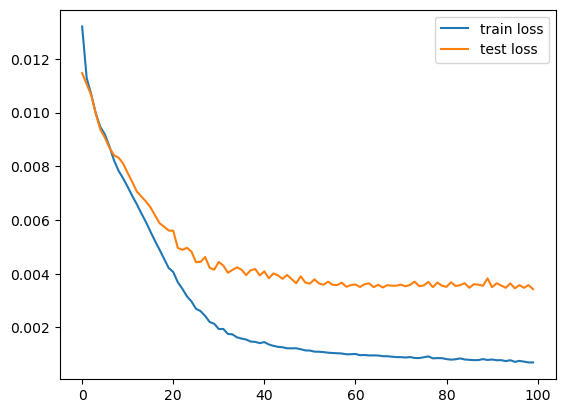

In [20]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [21]:
train_idx[:T+1]=False # First T+1 values are not predictable

In [22]:
Ptrain=model.predict(Xtrain).flatten()
Ptest=model.predict(Xtest).flatten()

1/1 [==============================] - 0s 31ms/step


In [25]:
# Store Diff predictions
df.loc[train_idx,'Diff Train Prediction']=Ptrain
df.loc[test_idx,'Diff Test Prediction']=Ptest

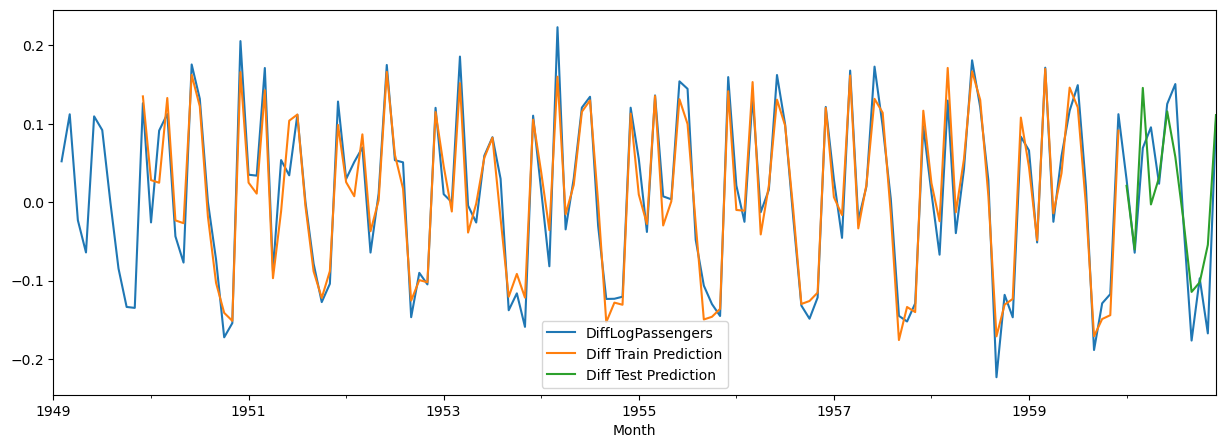

In [26]:
cols=['DiffLogPassengers',
     'Diff Train Prediction',
     'Diff Test Prediction']
df[cols].plot(figsize=(15,5));

In [28]:
# Needed to compute un differenced predictions
df['ShiftLogPassengers']=df['LogPassengers'].shift(1)
prev = df['ShiftLogPassengers']

In [29]:
# Last-known train value
last_train=train.iloc[-1]['LogPassengers']

In [31]:
# 1-step forecast
df.loc[train_idx,'1step_train']=prev[train_idx]+Ptrain
df.loc[test_idx,'1step_test']=prev[test_idx]+Ptest

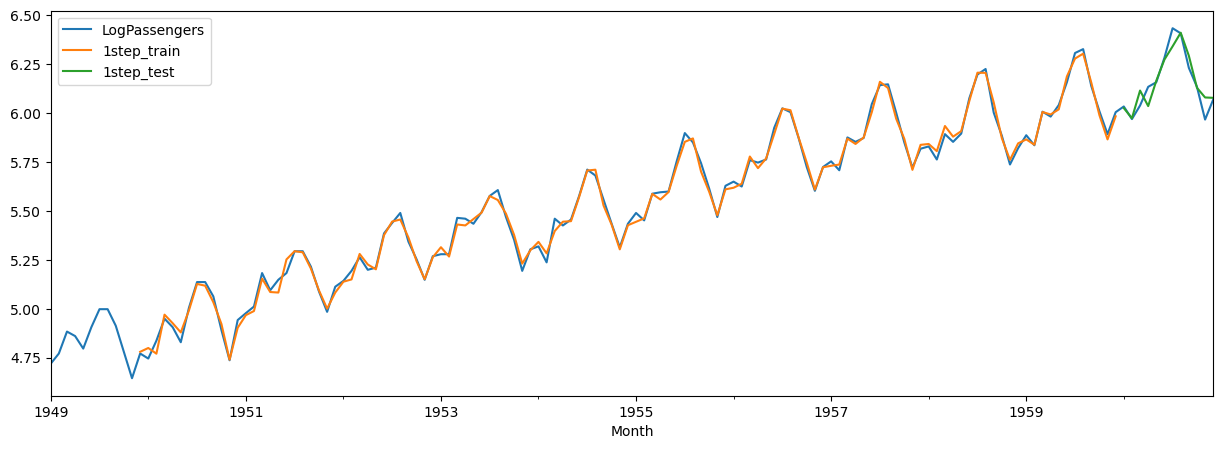

In [32]:
# plot 1-step forecast
df[['LogPassengers','1step_train','1step_test']].plot(figsize=(15,5));

In [34]:
# multi-step forecast
multistep_predictions=[]

# first test input
last_x=Xtest[0]

while len(multistep_predictions)<Ntest:
    p=model.predict(last_x.reshape(1,-1,1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)

    # Make the new input
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

1/1 [==============================] - 0s 47ms/step


In [35]:
# save multi-step forecast to dataframe
df.loc[test_idx,'multistep']=last_train+np.cumsum(multistep_predictions)

<Axes: xlabel='Month'>

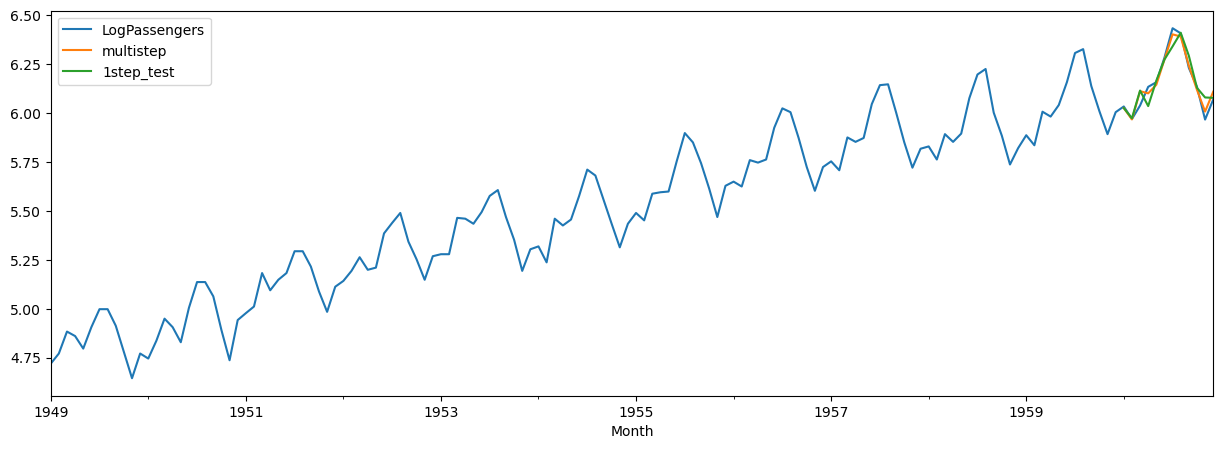

In [36]:
# plot 1-step and multi-step forecast
df[['LogPassengers','multistep','1step_test']].plot(figsize=(15,5))

In [37]:
# make multi-output supervised dataset
Tx=T
Ty=Ntest
X=[]
Y=[]
for t in range(len(series)-Tx-Ty+1):
    x=series[t:t+Tx]
    X.append(x)
    y=series[t+Tx:t+Tx+Ty]
    Y.append(y)
    
X=np.array(X).reshape(-1,Tx)
Y=np.array(Y).reshape(-1,Ty)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (122, 10) Y.shape (122, 12)


In [38]:
Xtrain_m,Ytrain_m=X[:-1],Y[:-1]
Xtest_m,Ytest_m=X[-1:],Y[-1:]

In [39]:
# CNN
i=Input(shape=(Tx,1))
x=Conv1D(16,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(32,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(Ty)(x)
model=Model(i,x)

In [40]:
model.compile(
loss='mse',
optimizer='adam')

In [41]:
r=model.fit(
Xtrain_m,
Ytrain_m,
epochs=200,
validation_data=(Xtest_m,Ytest_m)
)

Epoch 1/200
4/4 [==============================] - 2s 101ms/step - loss: 0.0123 - val_loss: 0.0109
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 3/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 6/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 7/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 8/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 9/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 10/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 11/200
4/4 [

Epoch 84/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 85/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 86/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 87/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 88/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 89/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 90/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 91/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 92/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 93/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 94/2

4/4 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 167/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 168/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 169/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 170/200
4/4 [==============================] - 0s 23ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 171/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 172/200
4/4 [==============================] - 0s 18ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 173/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 174/200
4/4 [==============================] - 0s 18ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 175/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 176/200


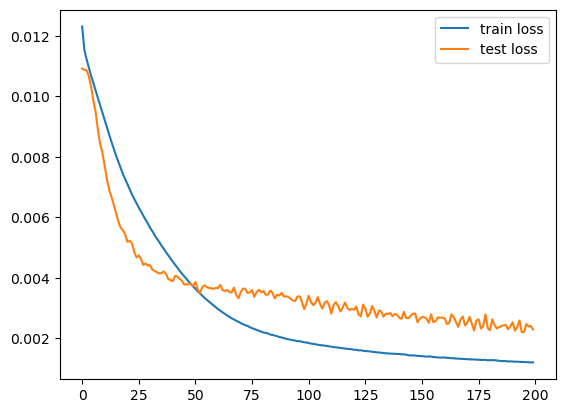

In [42]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [43]:
Ptrain=model.predict(Xtrain_m)
Ptest=model.predict(Xtest_m)

1/1 [==============================] - 0s 39ms/step


In [44]:
Ptrain.shape,Ptest.shape

((121, 12), (1, 12))

In [45]:
Ptrain=Ptrain[:,0]
Ptest=Ptest[0]

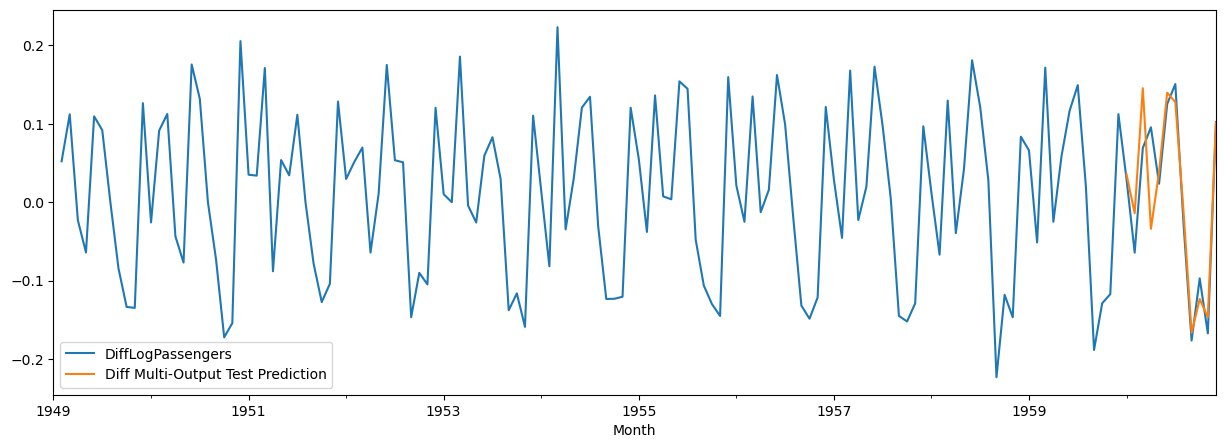

In [47]:
df.loc[test_idx,'Diff Multi-Output Test Prediction']=Ptest
cols=['DiffLogPassengers','Diff Multi-Output Test Prediction']
df[cols].plot(figsize=(15,5));

In [49]:
# save multi-outpur forecast to dataframe
df.loc[test_idx,'multioutput']=last_train+np.cumsum(Ptest)

<Axes: xlabel='Month'>

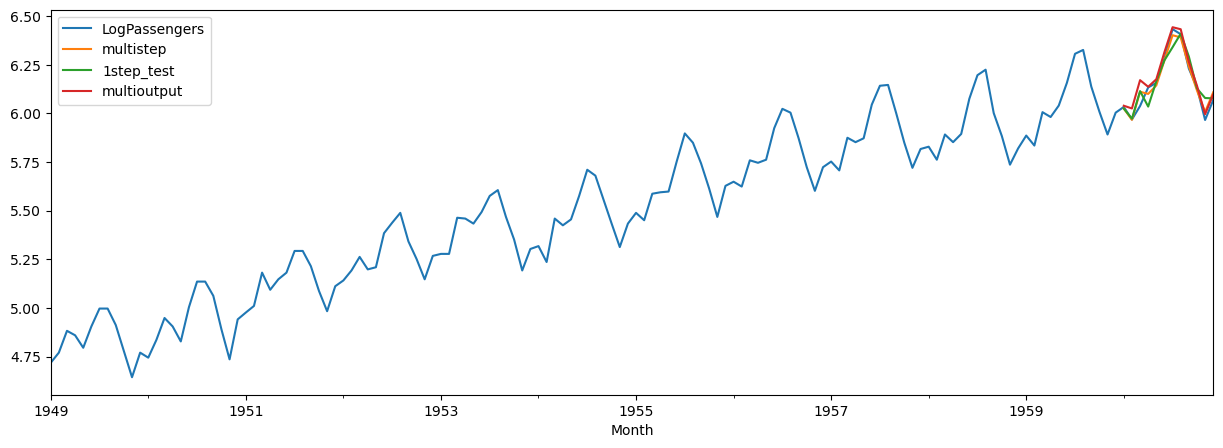

In [50]:
# plot all forecasts
cols=['LogPassengers','multistep','1step_test','multioutput']
df[cols].plot(figsize=(15,5))

In [51]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multistep'])
print('multi-step MAPE:',mape1)
mape2=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multioutput'])
print('multi-output MAPE:',mape2)

multi-step MAPE: 0.003992676128367051
multi-output MAPE: 0.005318573906646011
